<a href="https://colab.research.google.com/github/cloud-vinny/Computing_Tech_Proj_Assignment/blob/main/Spam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [52]:
df = pd.read_csv("dataset/cleaned_dataset.csv")
print(df.shape)
print("Columns:", df.columns.tolist())
print("First few rows:")
df.head()

(10598, 6)
Columns: ['text', 'spam', 'num_chars', 'num_words', 'num_sen10', 'preprocessed_text']
First few rows:


,text,spam,num_chars,num_words,num_sen10,preprocessed_text
0,2/2 146tf150p,1,13,2,1,146tf150p
1,"risk management book order vince , fyi , i o...",0,190,38,3,risk manag book order vinc fyi order risk mana...
2,so what about you. what do you remember,0,39,9,2,rememb
3,"how are you, my love ? are you with your broth...",0,147,35,4,love brother time talk english grin say hey mu...
4,great comedy..cant stop laughing da:),0,37,9,1,great comedi cant stop laugh da


**Data Cleaning**

In [53]:
#lowercase all the chars
df.text = df.text.str.lower()

In [54]:
# Clear and repeated word : "subject: " , "re :" , "fw :" , and "news :" .
df['text'] = df['text'].str.replace("subject: ", "", regex=True)
df['text'] = df['text'].str.replace("re : ", "", regex=True)
df['text'] = df['text'].str.replace("fw : ", "", regex=True)
df['text'] = df['text'].str.replace("news : ", "", regex=True)

df.sample(10)

,text,spam,num_chars,num_words,num_sen10,preprocessed_text
8732,candidate vince : here is the resume of same...,0,1830,489,19,candid vinc resum samer friend azurix stinson ...
1410,"greetings from u . a . e hello my dear , bef...",1,1976,373,22,greet u e hello dear introduc wish inform lett...
9866,yo dude guess who just got arrested the other day,0,49,10,1,yo dude guess got arrest day
3759,your account has been credited with 500 free t...,1,130,28,2,account credit 500 free text messag activ txt ...
6202,and i don't plan on staying the night but i pr...,0,73,18,1,plan stay night prolli wo back til late
1965,depends on quality. if you want the type i sen...,0,107,25,2,depend qualiti want type sent boy fade glori w...
8907,"magic 15 , 000 level on nikkei - - - - - - - ...",0,1763,377,12,magic 15 000 level nikkei forward leann walton...
1536,reply to your email / ignore my voicemail vin...,0,4248,900,61,repli email ignor voicemail vinc thank want ge...
9034,friday brown bag lunch on option pricing vinc...,0,2168,475,18,friday brown bag lunch option price vinc thank...
4508,wharton business plan competition hi anne ! ...,0,2367,497,29,wharton busi plan competit hi ann wharton tues...


In [55]:
#checking if there's any missing value of both column
df.isnull().sum()

text                 0
spam                 0
num_chars            0
num_words            0
num_sen10            0
preprocessed_text    1
dtype: int64

In [56]:
#checking if there's any duplicate in text column
df["text"].duplicated().sum()

np.int64(0)

In [57]:
# Remove the duplicate and keep the first one
df = df.drop_duplicates(keep="first")

In [58]:
# Checking the duplicated if it's removed
df.duplicated().sum()

np.int64(0)

**Exploratory Data Analysis**

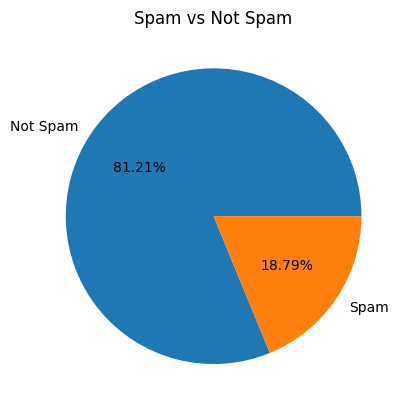

In [59]:
counts = df['spam'].value_counts()
label_map = {1: 'Spam', 0: 'Not Spam'}
labels = [label_map[i] for i in counts.index]

plt.pie(counts,labels=labels,autopct='%0.2f%%')
plt.title('Spam vs Not Spam')
plt.show()
# result shows of imbalance df between not spam and spam

In [60]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [61]:
# Tokenization
df['num_chars']=df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sen10'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,text,spam,num_chars,num_words,num_sen10,preprocessed_text
0,2/2 146tf150p,1,13,2,1,146tf150p
1,"risk management book order vince , fyi , i o...",0,190,38,3,risk manag book order vinc fyi order risk mana...
2,so what about you. what do you remember,0,39,9,2,rememb
3,"how are you, my love ? are you with your broth...",0,147,35,4,love brother time talk english grin say hey mu...
4,great comedy..cant stop laughing da:),0,37,9,1,great comedi cant stop laugh da


In [62]:
df[['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,10598.000000,10598.000000,10598.000000
mean,838.425269,177.056614,11.037271
std,1660.863433,341.413586,27.762059
min,3.000000,1.000000,1.000000
25%,63.000000,15.000000,1.000000
50%,196.000000,43.000000,4.000000
75%,1001.000000,215.750000,12.000000
max,43928.000000,8471.000000,1565.000000


In [63]:
# Not Spam
df[df['spam'] == 0 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,8607.000000,8607.000000,8607.000000
mean,814.859881,173.856512,10.484141
std,1583.168935,329.053969,28.455811
min,3.000000,1.000000,1.000000
25%,51.000000,13.000000,1.000000
50%,154.000000,36.000000,3.000000
75%,1042.000000,223.000000,12.000000
max,43928.000000,8471.000000,1565.000000


In [64]:
# Spam
df[df['spam'] == 1 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,1991.000000,1991.000000,1991.000000
mean,940.297338,190.890507,13.428428
std,1958.841880,390.157658,24.401021
min,9.000000,2.000000,1.000000
25%,157.000000,32.000000,3.000000
50%,423.000000,81.000000,7.000000
75%,917.000000,202.000000,13.500000
max,28418.000000,6128.000000,438.000000


<Axes: xlabel='num_chars', ylabel='Count'>

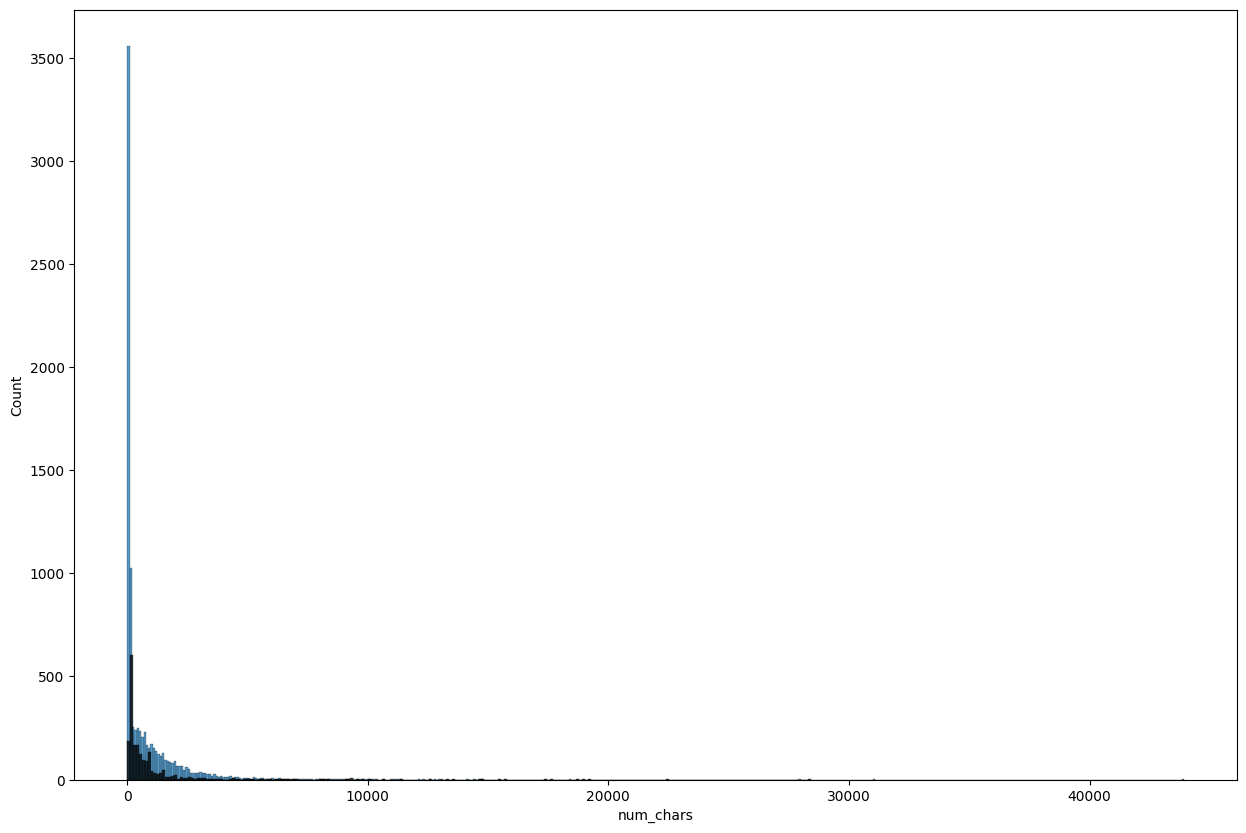

In [65]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="black")

<Axes: xlabel='num_chars', ylabel='Count'>

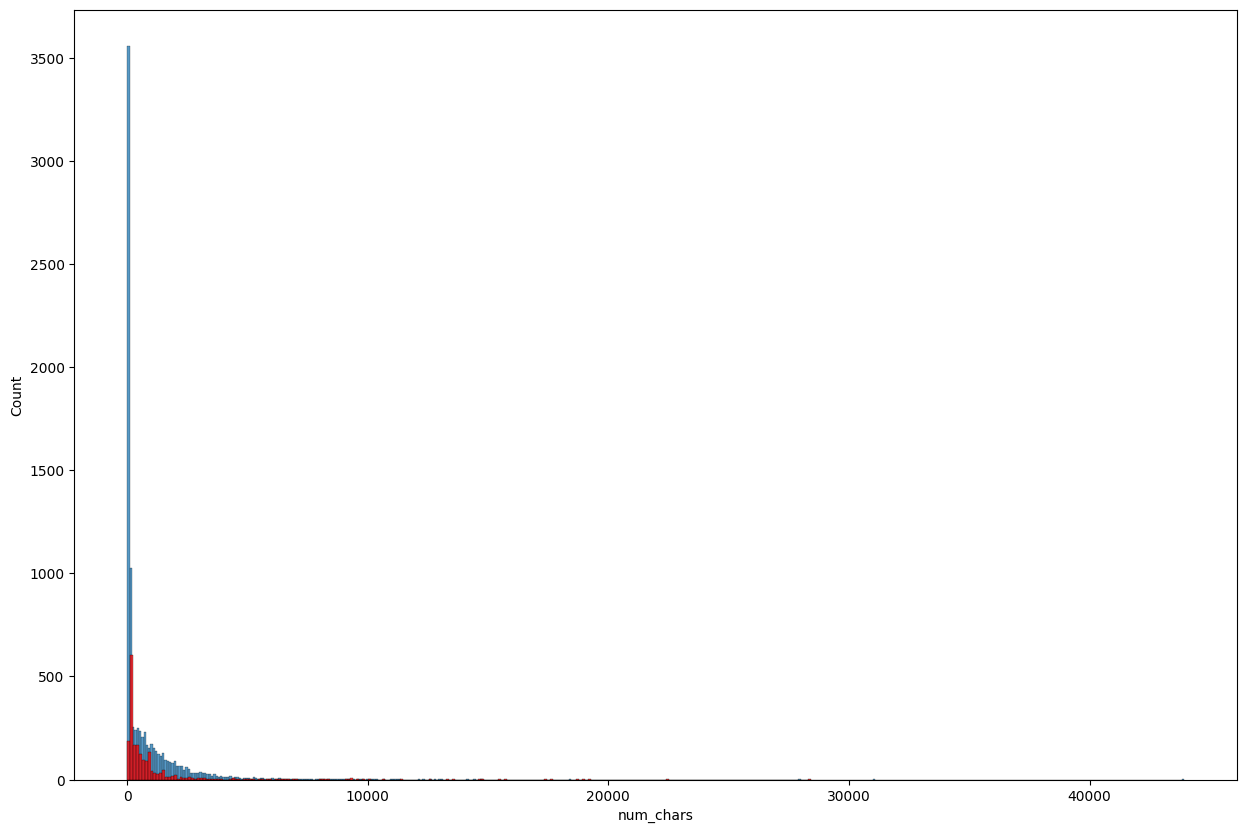

In [66]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="red")

<Axes: xlabel='num_sen10', ylabel='Count'>

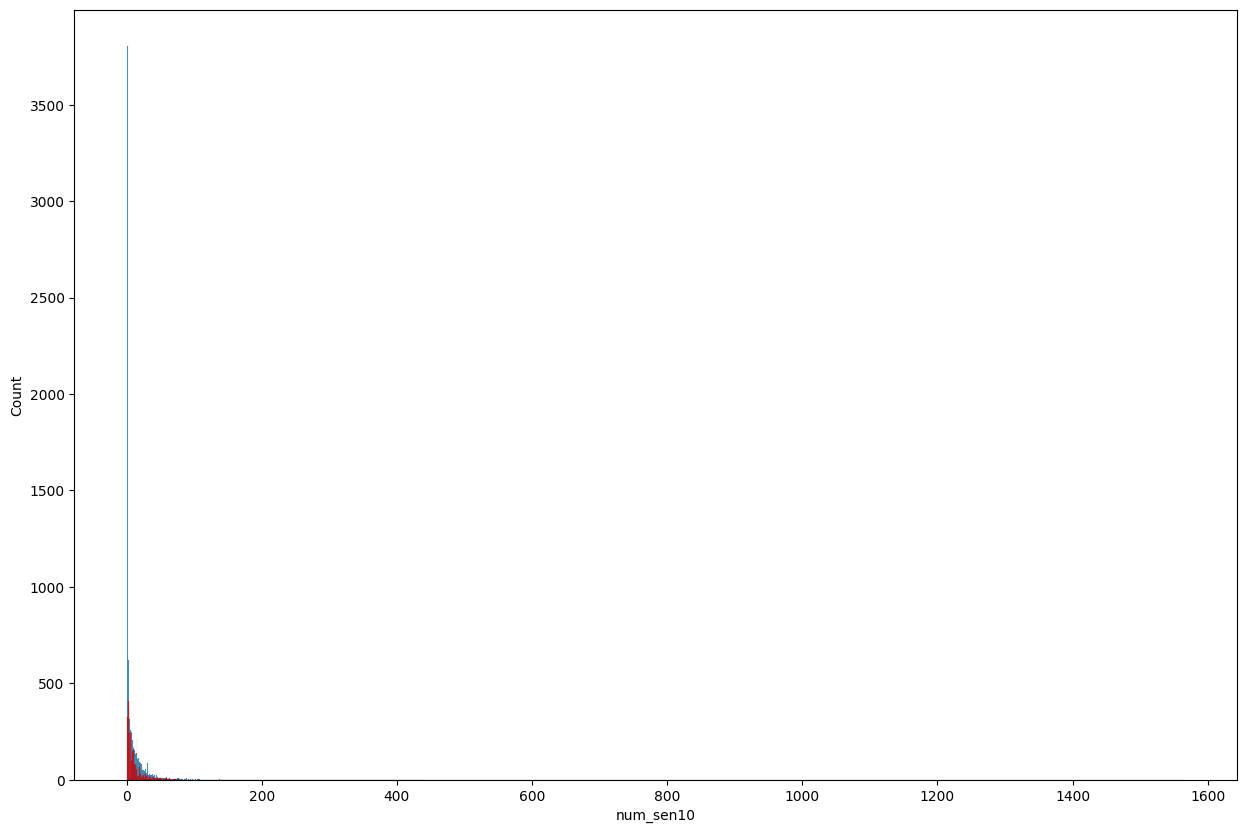

In [67]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_sen10'])
sns.histplot(df[df['spam'] == 1]['num_sen10'], color="red")

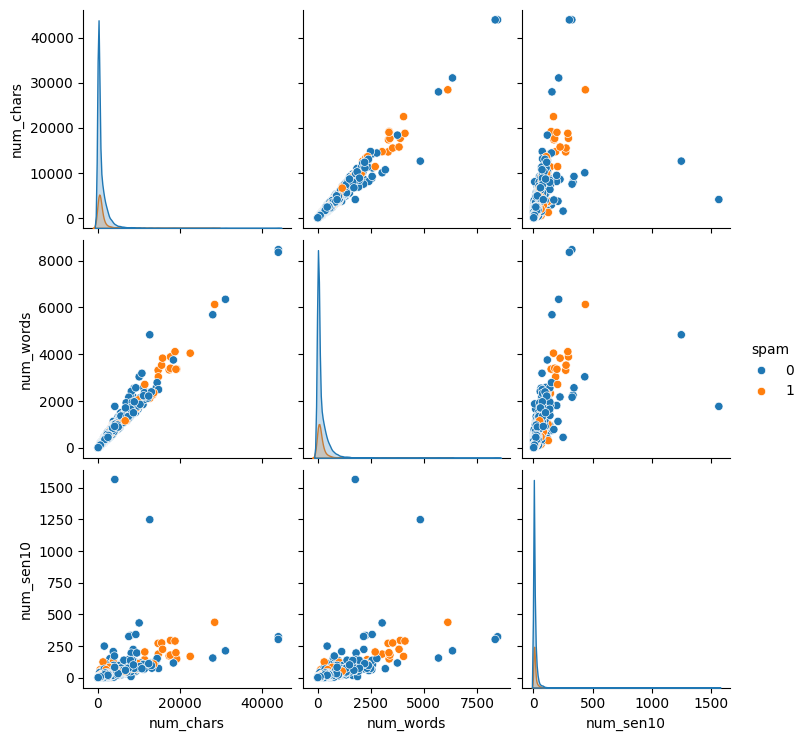

In [68]:
sns.pairplot(df,hue='spam')

In [69]:
# Correlation
corr = df.select_dtypes(include=['number']).corr()
print(corr)

               spam  num_chars  num_words  num_sen10
spam       1.000000   0.029502   0.019489   0.041427
num_chars  0.029502   1.000000   0.988838   0.646461
num_words  0.019489   0.988838   1.000000   0.702245
num_sen10  0.041427   0.646461   0.702245   1.000000


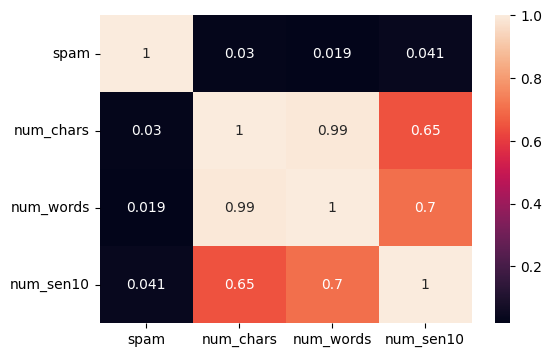

In [70]:
# Heat Map
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)
plt.show()

**Data Preprocessing**


In [71]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
from nltk.stem.porter import PorterStemmer
#Stemming method
ps = PorterStemmer()
ps.stem('cooking')

'cook'

In [73]:
def text_transform(text):
  text = text.lower() #lowercase
  text = nltk.word_tokenize(text) #tokenize

  # remove special chars & stopwords & punctuation & stemming
  b = []
  for a in text:
    if a.isalnum() and a not in stopwords.words('english') and a not in string.punctuation:
      b.append(ps.stem(a))

  return " ".join(b)

In [74]:
text = df['text'][500]
# text = "I loved to play basketball and watching anime. How about you? bro"
text_transform(text)

'privat 2003 account statement show 800 point call 08715203652 identifi code 42810 expir'

In [75]:
df["preprocessed_text"] = df['text'].apply(text_transform)
df.head(10)

,text,spam,num_chars,num_words,num_sen10,preprocessed_text
0,2/2 146tf150p,1,13,2,1,146tf150p
1,"risk management book order vince , fyi , i o...",0,190,38,3,risk manag book order vinc fyi order risk mana...
2,so what about you. what do you remember,0,39,9,2,rememb
3,"how are you, my love ? are you with your broth...",0,147,35,4,love brother time talk english grin say hey mu...
4,great comedy..cant stop laughing da:),0,37,9,1,great comedi cant stop laugh da
5,peniss growth patches are here ! . . . quintes...,1,926,190,25,peniss growth patch quintessenti good morn sir...
6,april lst party ! this is primarily for enron...,0,275,54,6,april lst parti primarili enron research psued...
7,is your hamster dead? hey so tmr i meet you at...,0,64,16,2,hamster dead hey tmr meet 1pm orchard mrt
8,i don't know u and u don't know me. send chat ...,1,158,36,5,know u u know send chat 86688 let find rcvd ld...
9,"up to $ 1 , 500 . 00 part time 22311 check ou...",1,905,210,15,1 500 00 part time 22311 check 1 000 00 intern...


In [76]:
#save the current dataset
df.to_csv("dataset/preprocessed_dataset.csv")

In [77]:
from wordcloud import WordCloud

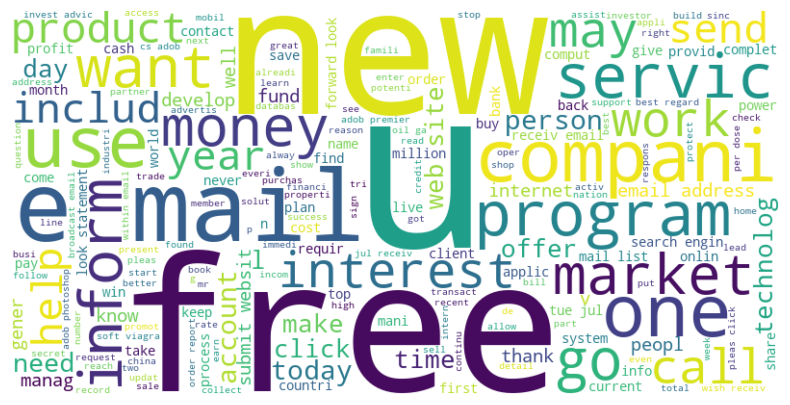

In [78]:
# Generate word cloud only for spam messages
wc = WordCloud(width=800, height=400, background_color='white')
spam_wc = wc.generate(df[df['spam'] == 1]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

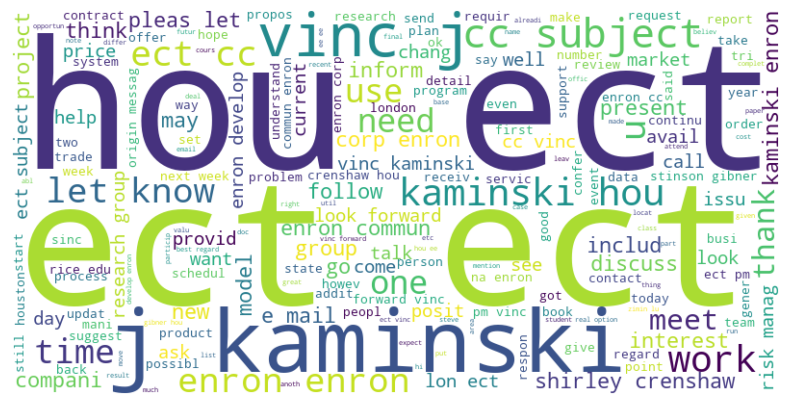

In [79]:
# Generate word cloud only for non spam messages
non_spam_wc = wc.generate(df[df['spam'] == 0]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
spam_corpus = []
for msg in df[df['spam'] == 1]['preprocessed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus)

182513

In [81]:
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,compani,1067
1,com,999
2,1,978
3,mail,917
4,busi,896
5,email,866
6,inform,827
7,free,786
8,get,766
9,2,761


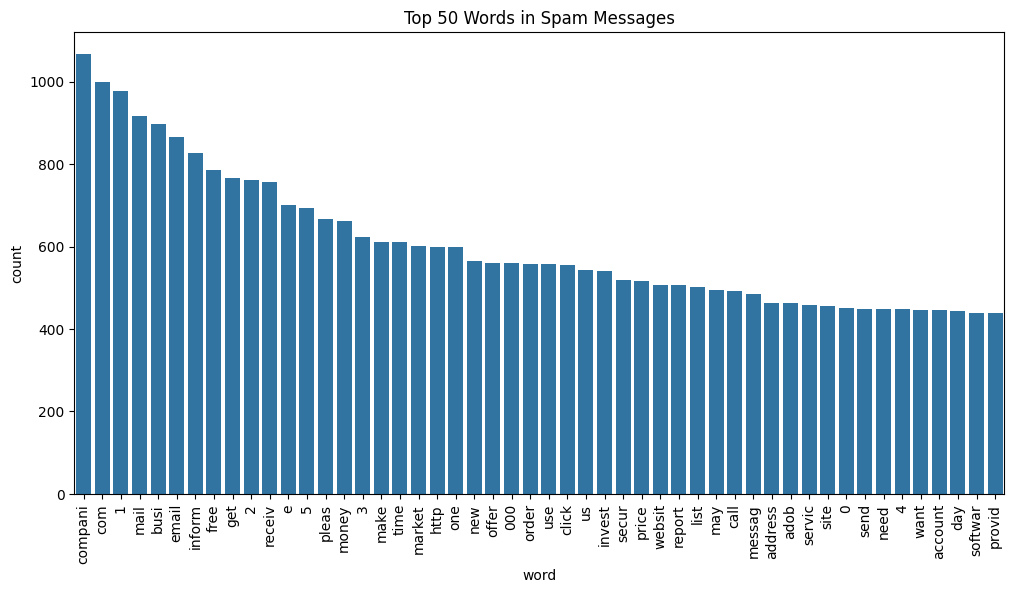

In [82]:
spam_word_counts = Counter(spam_corpus).most_common(50)
df_swc = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_swc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Spam Messages")
plt.show()

In [83]:
non_spam_corpus = []
for msg in df[df['spam'] == 0]['preprocessed_text'].tolist():
  for word in msg.split():
    non_spam_corpus.append(word)
len(non_spam_corpus)

702447

In [84]:
Counter(non_spam_corpus).most_common(50)

[('enron', 12611),
 ('ect', 10972),
 ('vinc', 8027),
 ('hou', 5331),
 ('2000', 4909),
 ('kaminski', 4480),
 ('pleas', 4300),
 ('com', 4240),
 ('subject', 4003),
 ('would', 3986),
 ('cc', 3644),
 ('j', 3509),
 ('thank', 3436),
 ('pm', 3060),
 ('forward', 2789),
 ('2001', 2666),
 ('time', 2662),
 ('research', 2596),
 ('2', 2518),
 ('meet', 2509),
 ('know', 2464),
 ('1', 2448),
 ('group', 2304),
 ('work', 2265),
 ('manag', 2208),
 ('10', 2124),
 ('like', 2088),
 ('market', 2057),
 ('price', 2053),
 ('energi', 2049),
 ('model', 2015),
 ('risk', 1989),
 ('get', 1985),
 ('need', 1963),
 ('power', 1887),
 ('may', 1855),
 ('let', 1848),
 ('3', 1815),
 ('inform', 1786),
 ('regard', 1779),
 ('new', 1763),
 ('use', 1741),
 ('call', 1667),
 ('00', 1646),
 ('develop', 1623),
 ('one', 1605),
 ('11', 1597),
 ('corp', 1583),
 ('look', 1579),
 ('01', 1577)]

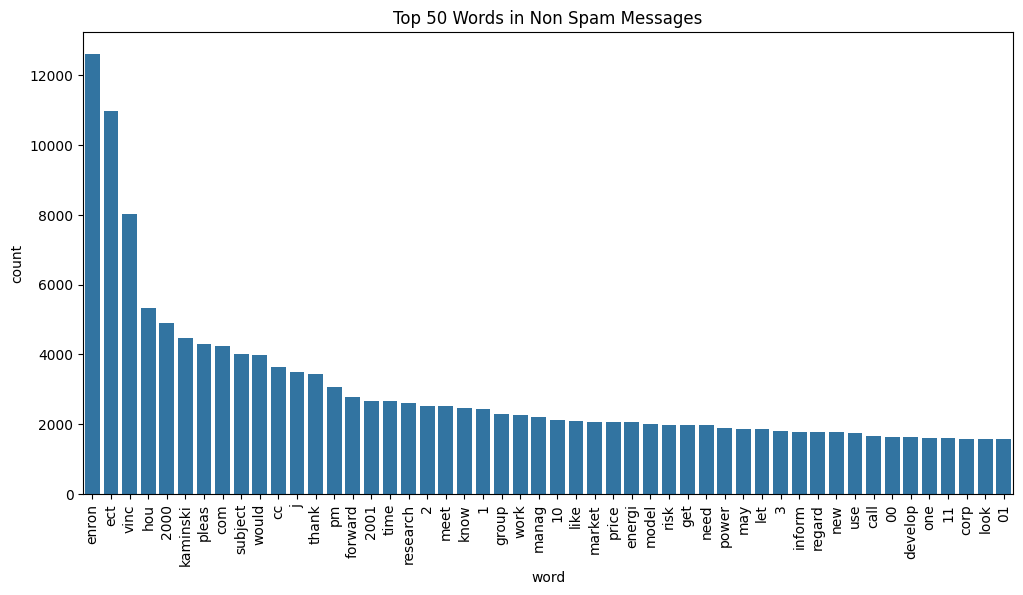

In [85]:
n_spam_word_counts = Counter(non_spam_corpus).most_common(50)
df_nswc = pd.DataFrame(n_spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_nswc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Non Spam Messages")
plt.show()

**Model Building**

In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [87]:
cv = CountVectorizer()
X = cv.fit_transform(df['preprocessed_text']).toarray()

# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df['preprocessed_text']).toarray()

In [88]:
X.shape

(10598, 32446)

In [89]:
y = df['spam'].values
y

array([1, 0, 0, ..., 0, 0, 0], shape=(10598,))

***Spliting Train = 80% and Test = 20%***

In [90]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=2)

***Train***

In [91]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [92]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy_score: ")
print(accuracy_score(y_test,y_pred1))
print("Confusion_matrix: ")
print(confusion_matrix(y_test,y_pred1))
print("Precision_score: ")
print(precision_score(y_test,y_pred1))

Accuracy_score: 
0.7679245283018868
Confusion_matrix: 
[[1275  450]
 [  42  353]]
Precision_score: 
0.4396014943960149


In [93]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score: ")
print(accuracy_score(y_test,y_pred2))
print("confusion_matrix: ")
print(confusion_matrix(y_test,y_pred2))
print("precision_score: ")
print(precision_score(y_test,y_pred2))

accuracy_score: 
0.9047169811320754
confusion_matrix: 
[[1532  193]
 [   9  386]]
precision_score: 
0.6666666666666666


In [94]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score: ")
print(accuracy_score(y_test,y_pred3))
print("confusion_matrix: ")
print(confusion_matrix(y_test,y_pred3))
print("precision_score: ")
print(precision_score(y_test,y_pred3))

accuracy_score: 
0.9165094339622641
confusion_matrix: 
[[1704   21]
 [ 156  239]]
precision_score: 
0.9192307692307692


***TESTING PREDICTION***

In [95]:
num = 1020
mess = df['text'][num]
print(f'Message: "{mess}"')

# Apply your preprocessing
mess = text_transform(mess)

# Convert to vector (same as training!)
mess_vec = cv.transform([mess])

#actual
actual = df['spam'][num]
if actual == 1:
  print("Actual: SPAM " )
else:
  print("Prediction: NON SPAM ")


# Predict
y_pred3 = bnb.predict(mess_vec)

if y_pred3 == 1:
  print("Prediction: SPAM " )
else:
  print("Prediction: NON SPAM ")


Message: "contact  jana ,  a correction . i am going to spend one week in australia and i have  just realized that i have to leave on friday , july the 14 th , at night ,  to arrive in sydney on sunday morning .  maybe we can meet on friday the 7 th ( we would like to invite you  to dinner and then we can have a glass of wine outside , the weather  and mosquitoes permitting ) .  alternatively , we can meet during the weekend of july the 29 th .  vince  jlpnymex @ aol . com on 06 / 26 / 2000 01 : 27 : 41 pm  to : vince . j . kaminski @ enron . com  cc :  subject : contact  vince ,  the weekend of july 15 , 2000 is fine for us . which day is better for  you - - friday or saturday ?  do you want to go to the woodlands for a show , or just visit ? also , let me  know if i can bring something .  thanks and we look forward to meeting your family .  jana"
Prediction: NON SPAM 
Prediction: NON SPAM 
